In [1]:
#Unsupervised Learning Algorithm  : unLabelled data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
#To load dataset mall.csv
df=pd.read_csv("mall.csv")
#to display first 5 records
df.head()

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [4]:
#How many rows and columns
df.shape

(303, 2)

In [5]:
#To check datatypes
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [6]:
#To check null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

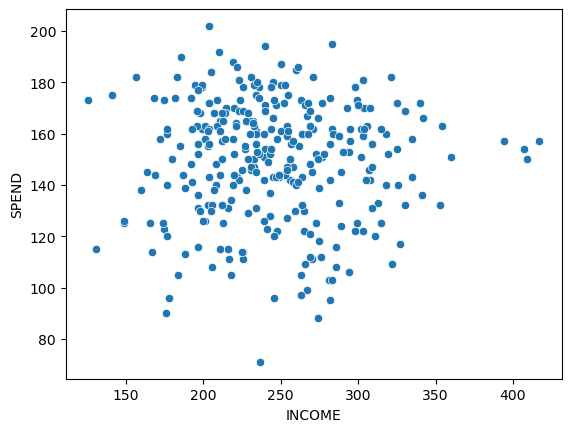

In [7]:
#Visualise INCOME and SPEND 
#here 
X1=df['INCOME']
X2=df['SPEND']
sns.scatterplot(data=df,x='INCOME',y='SPEND')
plt.show()

In [8]:
#TO COPY THE DATAFRAME IN NEW DATAFRAME
df_copy=df.copy() #copy() inbuilt method 

In [9]:
df_copy.head()

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [10]:
df.head()

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [11]:
#Apply standardscaler on df_copy dataframe
from sklearn.preprocessing import StandardScaler
#Create object of StandardScaler class
ss=StandardScaler()
df_copy=ss.fit_transform(df_copy)

In [12]:
df_copy

array([[-0.25349239,  0.01544279],
       [ 0.09760718,  1.63347147],
       [-0.85242694,  0.97751389],
       [-0.19153364,  1.23989692],
       [ 2.24551041,  0.58393935],
       [-1.10026193, -0.07201822],
       [ 1.00633547,  0.1466343 ],
       [ 0.36609508,  1.0212444 ],
       [-0.95569152,  0.54020884],
       [-1.59593191,  1.0649749 ],
       [-0.12957489,  0.45274783],
       [ 0.61393007, -0.46559277],
       [ 0.42805383,  0.93378339],
       [-0.70785653, -0.24694024],
       [ 0.7791534 ,  0.54020884],
       [-0.54263321,  0.36528682],
       [ 1.95636959,  0.97751389],
       [-0.3980628 , -1.55885539],
       [ 0.03564843,  0.93378339],
       [-0.12957489,  0.05917329],
       [-0.23283947,  0.49647834],
       [-0.25349239,  1.28362743],
       [-0.3980628 ,  1.23989692],
       [-0.04696323, -0.55305378],
       [-0.95569152,  1.23989692],
       [ 1.1715588 ,  0.54020884],
       [-0.68720362,  0.32155632],
       [-1.4513615 , -1.16528085],
       [ 3.54664411,

In [13]:
type(df_copy)

numpy.ndarray

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.head()

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [16]:
#How many categories/clusters in given dataset 
#use ELBOW Technique 
#assign no. of clusters k=1 to 20 and findout sum of squared error sse
from sklearn.cluster import KMeans
#Declare Empty list for sum of squared error
SSE=[]
#Declare Empty list for No. of clusters
K_cluster=[]
for k in range(1,21): #start k=1 stop=21-1=20 step=+1
    #create object of KMeans class
    km=KMeans(n_clusters=k) #first time k=1 then k=2,........
    km.fit(df_copy) #train the model 
    #To add SSE error on list SSE
    SSE.append(km.inertia_) #inertia_  inbuilt attributes for Sum of Squared error
    K_cluster.append(k) #add value of k in K_cluster

In [17]:
K_cluster

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [18]:
SSE

[606.0,
 401.2249781212488,
 253.49352362498286,
 199.1868412391478,
 155.77002490204742,
 131.55210185496475,
 115.45742600394573,
 103.47916316225863,
 89.28924777401815,
 81.24939112937805,
 71.99391019663601,
 67.98298608249917,
 62.34790409691327,
 56.13246492474999,
 53.302379251542085,
 50.81335157253848,
 46.04758919287398,
 42.978688438319196,
 40.61954569219436,
 38.08127065531926]

In [19]:
#create a dictionary
dict={'K':K_cluster,'SSE':SSE}
df1=pd.DataFrame(dict)
df1

K         SSE
0    1  606.000000
1    2  401.224978
2    3  253.493524
3    4  199.186841
4    5  155.770025
5    6  131.552102
6    7  115.457426
7    8  103.479163
8    9   89.289248
9   10   81.249391
10  11   71.993910
11  12   67.982986
12  13   62.347904
13  14   56.132465
14  15   53.302379
15  16   50.813352
16  17   46.047589
17  18   42.978688
18  19   40.619546
19  20   38.081271

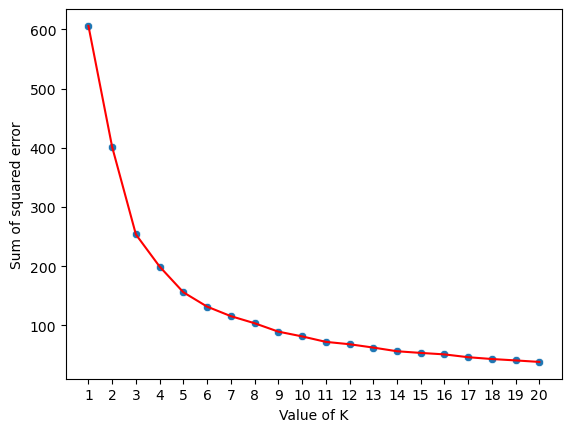

In [20]:
#Visualise scatter plot between K and SSE
sns.scatterplot(data=df1,x='K',y='SSE')
sns.lineplot(data=df1,x='K',y='SSE',color='red')
plt.ylabel('Sum of squared error')
plt.xlabel('Value of K')
plt.xticks(df1['K'])
plt.show()

In [21]:
#Here decide no. of clusters in given dataset k=5
#create object of Kmeans clusters class
km=KMeans(n_clusters=5,random_state=1)

In [22]:
#train the model and predict , use inbuilt method of KMeans class
Y_pred=km.fit_predict(df_copy)

In [23]:
Y_pred

array([3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 3, 3, 3, 0, 1, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 3,
       1, 1, 2, 3, 0, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 0, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 1, 4, 3, 3, 2,
       2, 4, 2, 2, 2, 1, 0, 0, 1, 3, 1, 2, 2, 3, 2, 2, 2, 0, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 0, 3, 2, 4, 2, 3,
       1, 3, 1, 3, 0, 0, 0, 4, 1, 1, 2, 3, 0, 3, 3, 2, 2, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 0, 3, 3, 2, 3, 2, 1, 2, 0, 0,
       3, 1, 0, 4, 1, 0, 1, 2, 4, 1, 3, 4, 2, 2, 1, 0, 0, 3, 2, 1, 3, 3,
       4, 3, 2, 3, 4, 3, 0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 3, 1, 4, 1, 4, 3,
       1, 0, 1, 4, 4, 0, 4, 0, 1, 4, 3, 4, 1, 4, 4, 1, 1, 1, 1, 3, 4, 3,
       0, 4, 0, 3, 1, 4, 2, 3, 4, 3, 4, 4, 4, 1, 4, 0, 3, 2, 2, 3, 4, 3,
       0, 0, 4, 0, 4, 4, 3, 3, 4, 3, 4, 2, 0, 3, 1, 0, 4, 2, 0, 2, 0, 4,
       2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 4, 4, 0,

In [24]:
df.head()

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [25]:
#to add new column Target in existing dataset df
df['Target']=Y_pred

In [26]:
df.head(20)

INCOME  SPEND  Target
0      233    150       3
1      250    187       2
2      204    172       2
3      236    178       2
4      354    163       1
5      192    148       0
6      294    153       1
7      263    173       3
8      199    162       2
9      168    174       2
10     239    160       3
11     275    139       3
12     266    171       3
13     211    144       0
14     283    162       1
15     219    158       2
16     340    172       1
17     226    114       0
18     247    171       2
19     239    151       3

In [27]:
df_0=df[df['Target']==0]
df_1=df[df['Target']==1]
df_2=df[df['Target']==2]
df_3=df[df['Target']==3]
df_4=df[df['Target']==4]

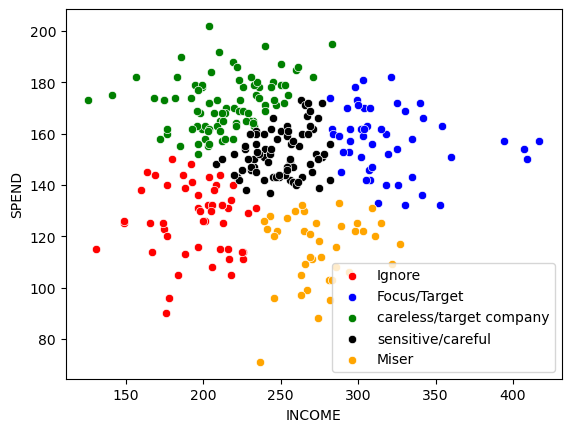

In [28]:
#Visualise 
sns.scatterplot(data=df_0,x='INCOME',y='SPEND',color="red",label="Ignore")
sns.scatterplot(data=df_1,x='INCOME',y='SPEND',color="blue",label="Focus/Target")
sns.scatterplot(data=df_2,x='INCOME',y='SPEND',color="green",label="careless/target company")
sns.scatterplot(data=df_3,x='INCOME',y='SPEND',color="black",label="sensitive/careful")
sns.scatterplot(data=df_4,x='INCOME',y='SPEND',color="orange",label="Miser")

plt.show()

In [29]:
#check centroid for each clusters (5 clusters)
#inbuilt attributes cluster_centers_    of KMeans cluster
km.cluster_centers_

array([[-1.03582484, -1.00172876],
       [ 1.53298482,  0.33205164],
       [-0.64637809,  0.96937799],
       [ 0.08172032,  0.11916257],
       [ 0.62452131, -1.51736748]])

In [32]:
#Remove scaling on centroid of each clusters , use inbuilt method inverse_transform() of
#StandardScaler class
ss.inverse_transform(km.cluster_centers_).round(2)

array([[195.12, 126.74],
       [319.5 , 157.24],
       [213.98, 171.81],
       [249.23, 152.37],
       [275.51, 114.95]])

In [ ]:
df_0.shape

In [ ]:
df_1.shape

In [ ]:
df_2.shape

In [ ]:
df_3.shape

In [ ]:
df_4.shape